<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Supervised%20Learning/Credit_Card_Fraud_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

import joblib

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load Dataset
path = "/content/drive/MyDrive/datasets/creditcard.csv"

df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#0 non-fraudulent
#1 fraudulent

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<Axes: xlabel='Class', ylabel='count'>

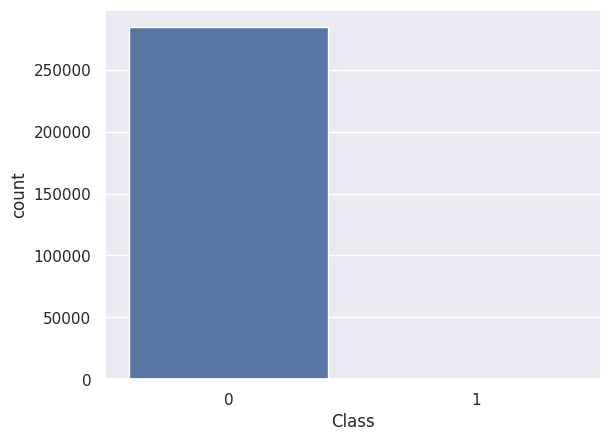

In [ ]:
#Exploratory Data Analysis
sns.set()
sns.countplot(x="Class", data=df)

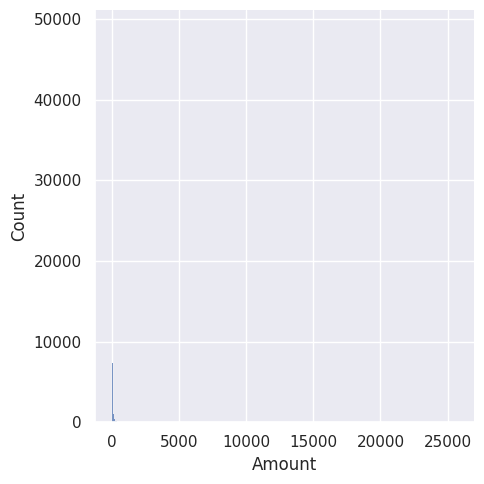

In [ ]:
sns.displot(df["Amount"])

<Axes: >

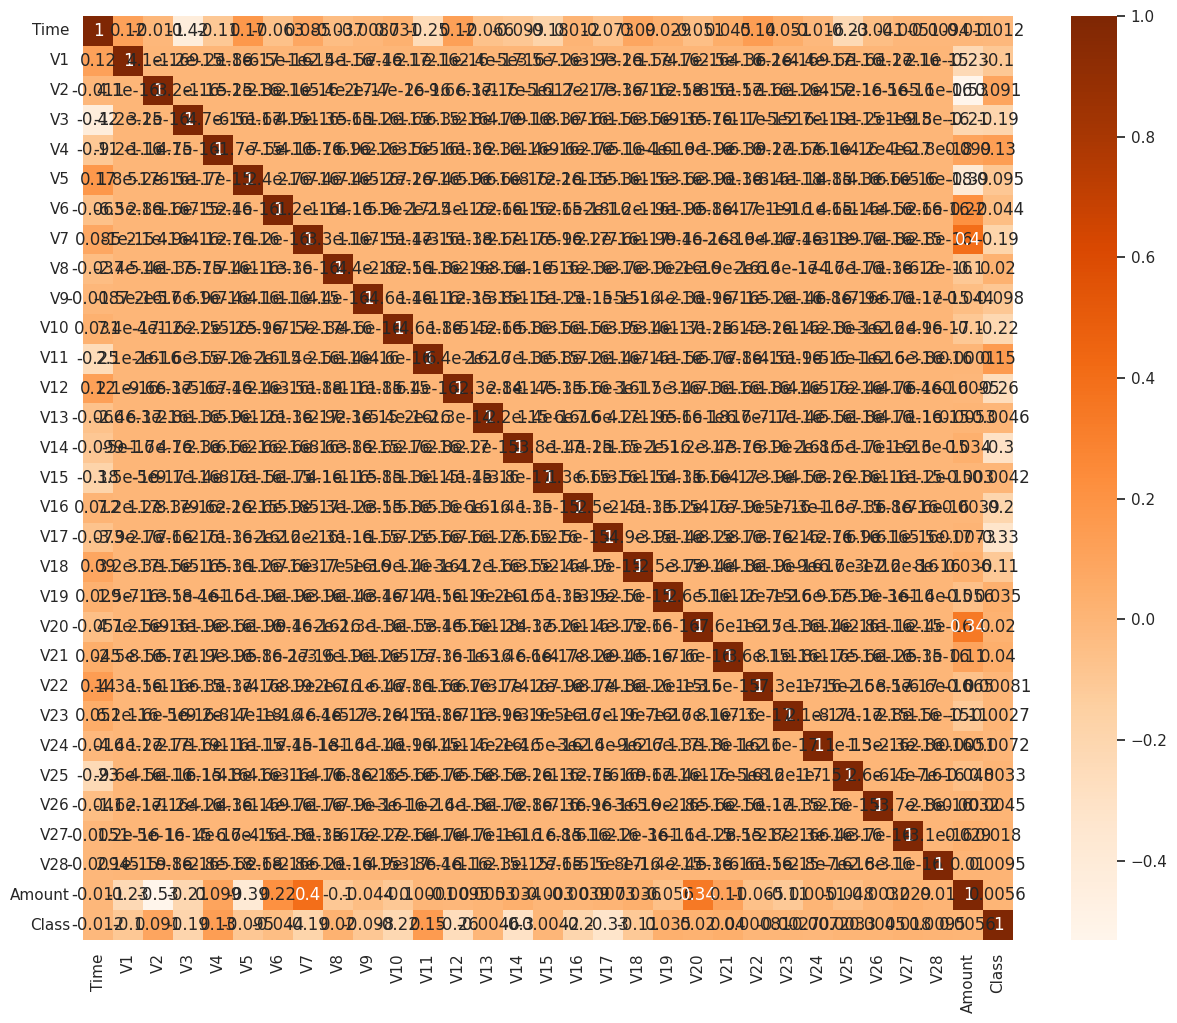

In [ ]:
#Correlation Matrix
corr = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, cmap="Oranges")

In [ ]:
#Split our Data
X = df.drop("Class", axis=1)
Y = df["Class"]

In [ ]:
#Do Some Standard Scaling
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.2, random_state=2
)

In [ ]:
#Fix Class Imbalancement
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote, Y_smote = smote.fit_resample(X_train,  y_train)

In [ ]:
#Model Function
def model_function(model):
    model.fit(X_smote, Y_smote)

    pred = model.predict(X_test)

    #Accuracy
    accuracy = accuracy_score(y_test, pred)
    matrix = confusion_matrix(y_test, pred)

    print("Accuracy: ", accuracy)
    sns.heatmap(matrix, annot=True, cmap="Purples")

Accuracy:  0.9996313331694814


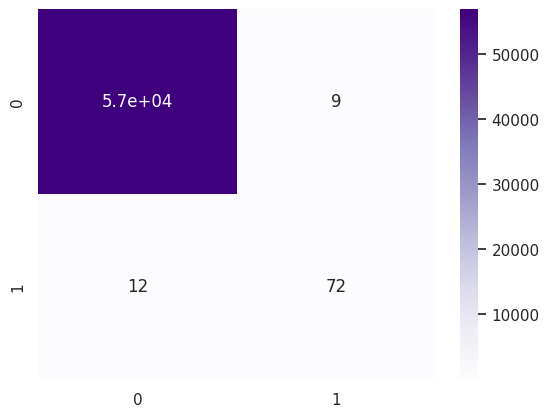

In [ ]:
extra = ExtraTreesClassifier()
model_function(extra)

In [ ]:
#Save our model
joblib.dump(extra, "credit_card_chatGPT.joblib")

['credit_card_chatGPT.joblib']

Accuracy:  0.9785822127032057


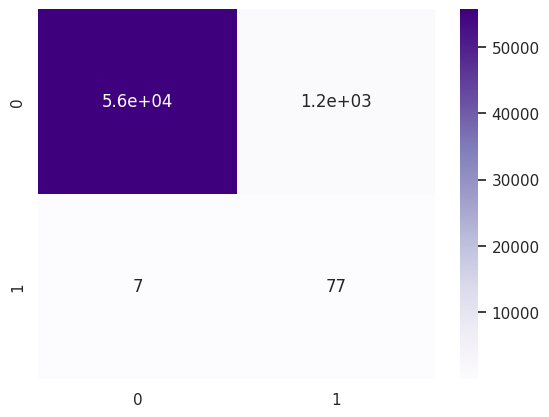

In [ ]:
#LinearSVC
linear = LinearSVC()
model_function(linear)